## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> This cell imports the essential Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).

## Load Dataset

In [22]:
df = pd.read_csv(r"C:\Users\sibus\Desktop\Projects\data_analysis_projects\auto_mpg\auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


> Loads the dataset **Auto MPG** with MPG standing for Miles Per Gallon, from a local directory into a datafrae called **df**

## Initial Data Inspection

In [23]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino



Performs a quick overview of the dataset:  
- `.info()` reveals column types and missing values  
- `.describe()` shows statistical summaries  
- `.head()` displays the first few rows for a quick structure check


## Data Cleaning 

In [24]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.dropna(subset=['horsepower', 'mpg', 'weight', 'acceleration'], inplace=True)


 - Replaces placeholder ? in horsepower with NaN

 - Converts horsepower to numeric

 - Drops rows with missing key numerical values for consistent analysis

## MPG Disctribution

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

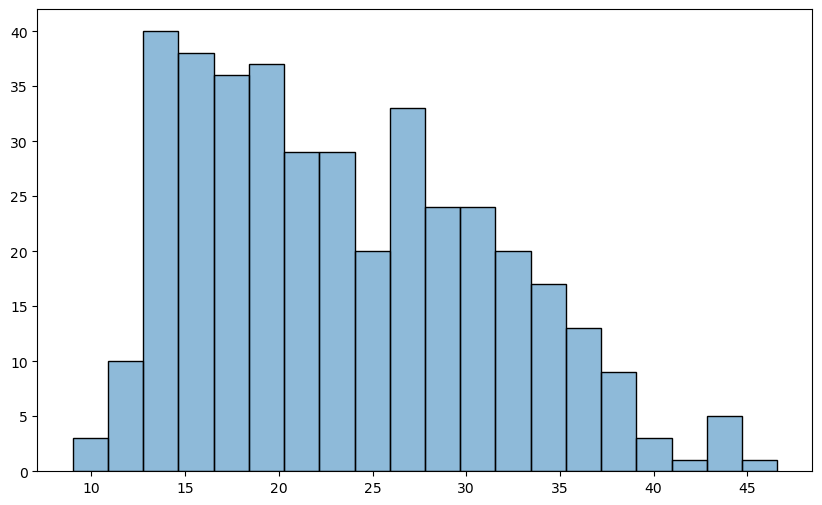

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True, bins=20)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.show()


> Shows how mpg values are distributed across cars. The KDE line reveals the underlying density, showing skewness or modality.

## MPG vs Weight by Origin

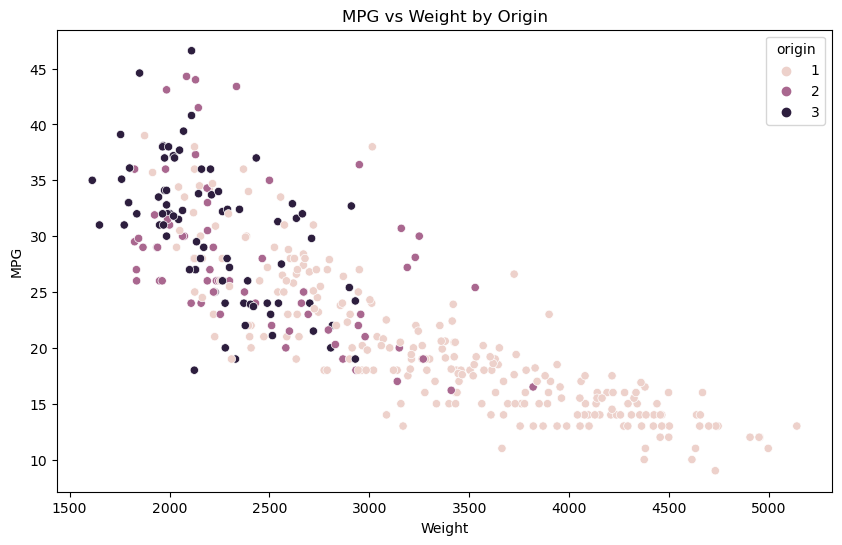

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin')
plt.title('MPG vs Weight by Origin')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()


> Explores the relationship between vehicle weight and fuel efficiency. The origin hue helps compare regional car characteristics.

## Average MPG by Cylinders

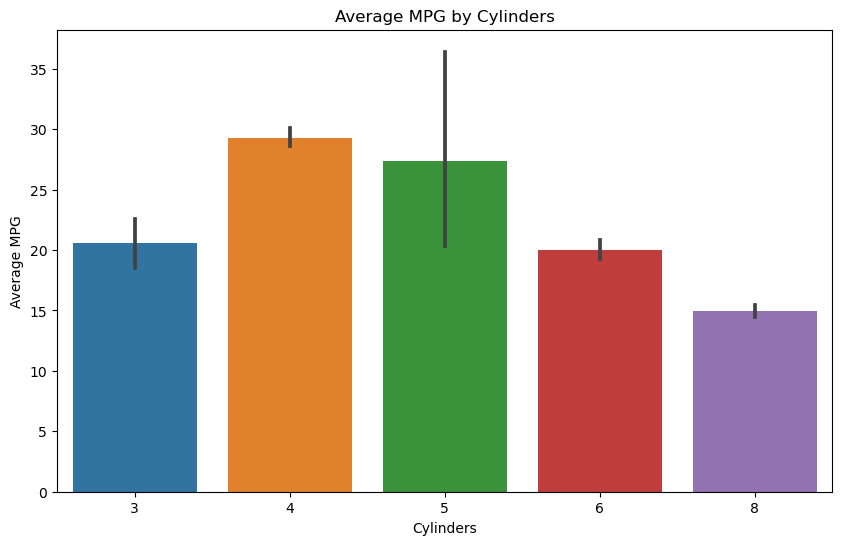

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cylinders', y='mpg', estimator=np.mean)
plt.title('Average MPG by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Average MPG')
plt.show()


> Analyzes how the number of cylinders in an engine affects average MPG. Useful for comparing fuel efficiency of different engine types.

## Average MPG OVer Model Years

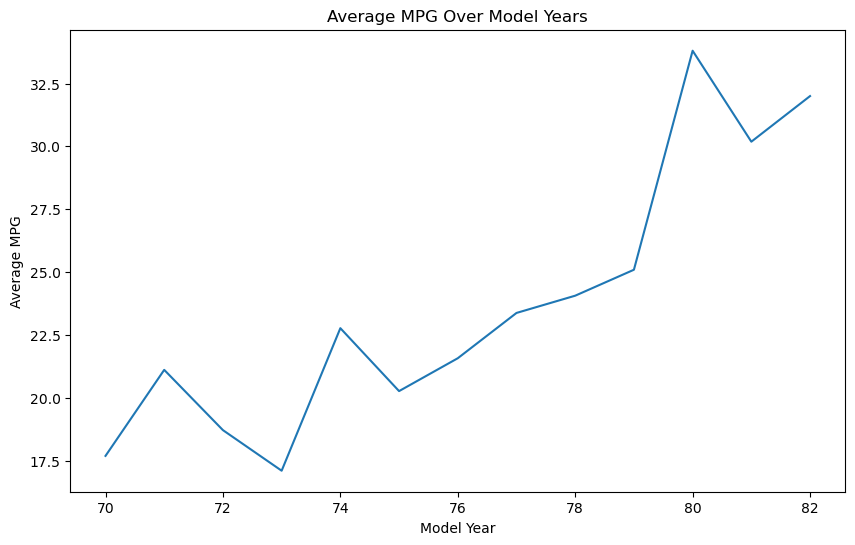

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='model year', y='mpg', estimator=np.mean, ci=None)
plt.title('Average MPG Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()


> Shows how fuel efficiency evolved over time. A rise in average MPG may indicate stricter fuel regulations or efficiency-focused engineering.

## Correlation Matrix

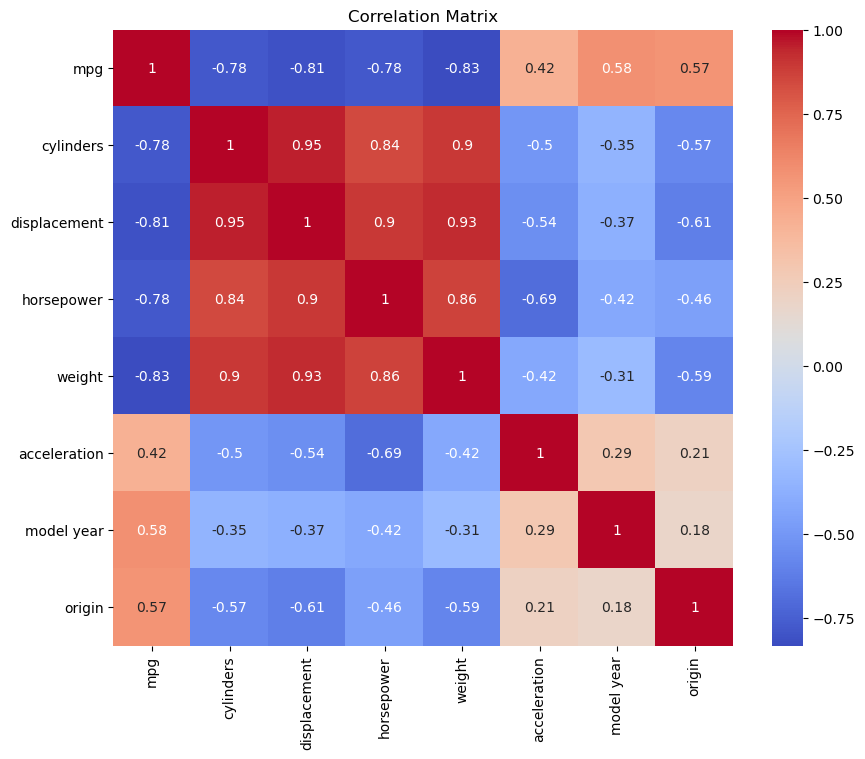

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


> Reveals relationships between numerical features. Strong negative or positive correlations hint at predictive relationships (e.g., weight vs. mpg).

## Horsepower vs MPG

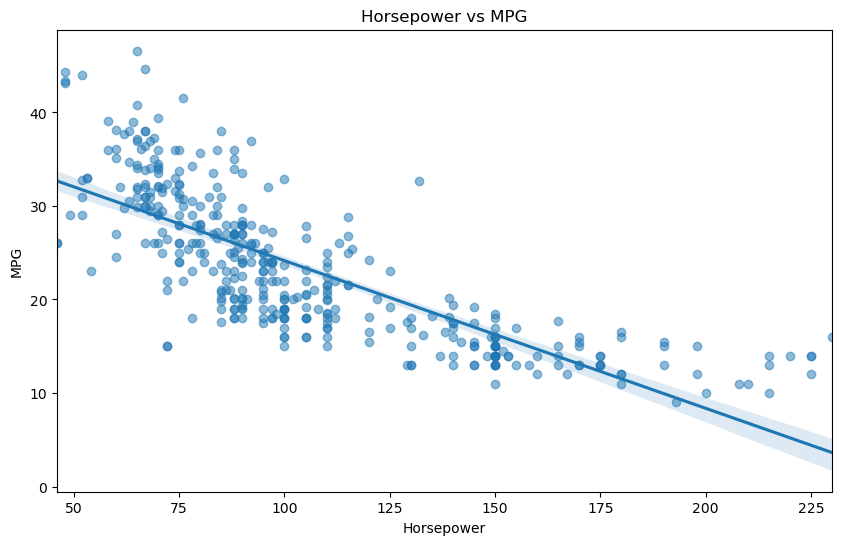

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='horsepower', y='mpg', scatter_kws={"alpha":0.5})
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()



> Adds a regression line to visualize the inverse relationship between horsepower and MPG. Helps assess how engine power affects fuel consumption.



## MPG Distribution by Origin

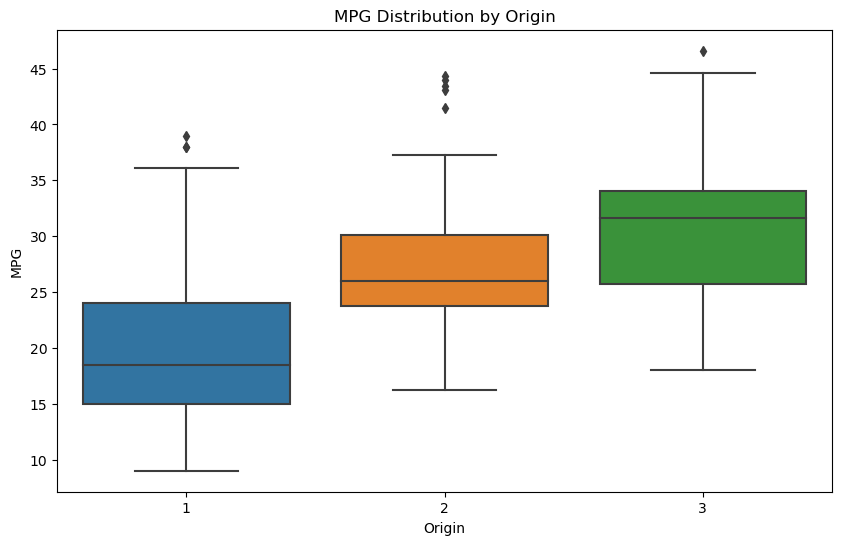

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='origin', y='mpg')
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()


> Compares the spread and medians of MPG across different regions. Useful for spotting regional efficiency trends and outliers.